In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import style  
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
import sklearn as sk
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
train = pd.read_csv("titanic_train_scaled.csv")
test = pd.read_csv("titanic_test_scaled.csv")

roc_auc= 0.4847619047619048


Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

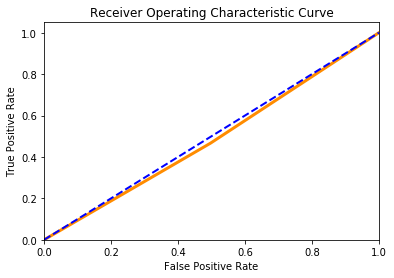

In [20]:
X=train.copy()
del X['Survived']
y=train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

classifier = KMeans(n_clusters = 2,random_state = 0).fit(X_train)

y_scores = classifier.predict(X_test)

fpr, tpr, _ = sk.metrics.roc_curve(y_test, y_scores)
roc_auc=auc(fpr,tpr)
print('roc_auc=',roc_auc)
plt.plot(fpr,tpr,color='darkorange',lw=3,label='ROC_Curve')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10)

In [28]:
scores.mean()

-2552042.873437057